In [1]:
import pandas as pd
import seaborn as sns
import mlflow
pd.set_option('display.float_format', '{:.2f}'.format)


ModuleNotFoundError: No module named 'seaborn'

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
pd.__version__

'2.2.3'

In [ ]:
# se

In [4]:
def read_dataframe(file_url):
    df = pd.read_parquet(file_url)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.apply(lambda td: td.total_seconds()/60)

    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)
    return df

In [5]:
df_train = read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-03.parquet")

In [6]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00,0.97,1.00,N,161,141,2,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00,8.43
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.00,1.10,1.00,N,43,237,1,7.90,1.00,0.50,4.00,0.00,1.00,16.90,2.50,0.00,6.32
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.00,2.51,1.00,N,48,238,1,14.90,1.00,0.50,15.00,0.00,1.00,34.90,2.50,0.00,12.75
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.00,1.90,1.00,N,138,7,1,12.10,7.25,0.50,0.00,0.00,1.00,20.85,0.00,1.25,9.62
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.00,1.43,1.00,N,107,79,1,11.40,1.00,0.50,3.28,0.00,1.00,19.68,2.50,0.00,10.83


In [7]:
# Question 1: Checking the number of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
# Question 2: Check std of `duration`

df_train.duration.describe(percentiles=[.95,.98,.99])


count   3066766.00
mean         15.67
std          42.59
min         -29.20
50%          11.52
95%          36.47
98%          48.73
99%          57.25
max       10029.18
Name: duration, dtype: float64

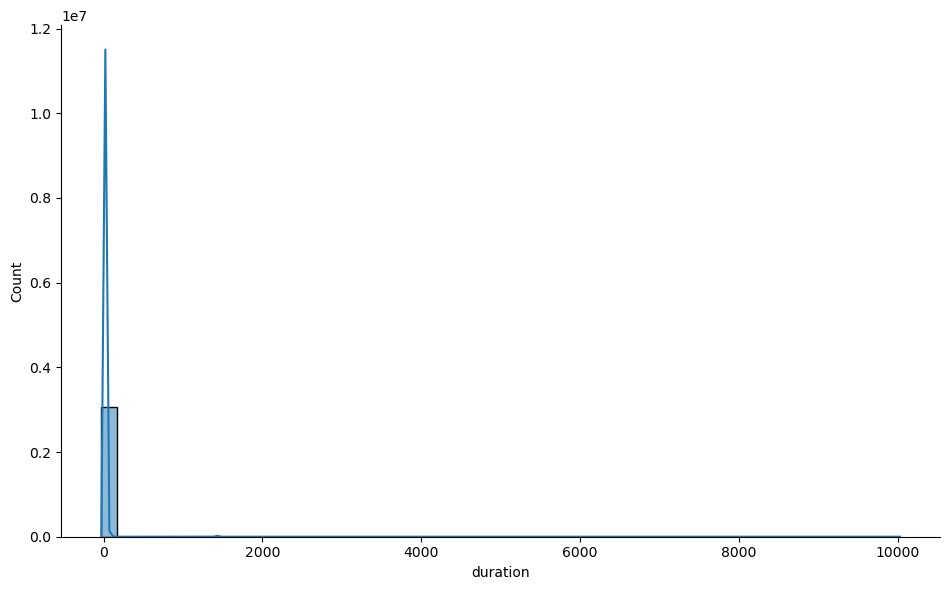

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df_train['duration'], bins=50, kde=True, height=6, aspect=1.6)

In [10]:
# Question 3 Percentage of duration 1-60 minutes
((df_train['duration']>=1) & (df_train['duration']<=60)).mean()

0.9812202822125979

In [11]:
df_train = df_train[(df_train['duration']>=1) & (df_train['duration']<=60)]

In [16]:
# Question 4
categorical = ['PULocationID','DOLocationID']

dv = DictVectorizer()
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [17]:
X_train.shape

(3009173, 515)

In [18]:
# Question 5 Train the model
# Step 1: Set the target (response) variable
y_train = df_train['duration'].values  # assuming 'duration' is already in minutes

# Step 2: Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 3: Predict on the training data
y_pred = lr.predict(X_train)

# Step 4: Calculate RMSE
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print(f"✅ RMSE on training data: {rmse:.2f} minutes")

✅ RMSE on training data: 7.65 minutes


In [21]:
# Question 6 RMSE on validation data
df_val = df_val[(df_val['duration']>=1) & (df_val['duration']<=60)]
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val['duration'].values

y_val_pred = lr.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f"✅ RMSE on validation data: {rmse_val:.2f} minutes")

✅ RMSE on validation data: 7.81 minutes
